In [66]:
# Before inputing the csv, I have changed the local_anthority_type of london to 'london_borough'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import os
os.chdir('/home/jovyan/work/QM/')
df = pd.read_csv('coursework_1_data_2019.csv', low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [67]:
#create new variable: Casechange_2013, Casechange_2018 and the per person budget in six areas in 2008 and 2013

df['Casechange2013'] = ((df['2013_cases_total']/df['2013_pop_total']) - (df['2008_cases_total']/df['2008_pop_total']))/(df['2008_cases_total']/df['2008_pop_total'])
df['Casechange2018'] = ((df['2018_cases_total']/df['2018_pop_total']) - (df['2013_cases_total']/df['2013_pop_total']))/(df['2013_cases_total']/df['2013_pop_total'])
df['Cleanair1'] = df['clean_air']/df['2008_pop_total']
df['Cleanenv1'] = df['clean_environ']/df['2008_pop_total']
df['Healthtrain1'] = df['health_training']/df['2008_pop_total']
df['Schoolaware1'] = df['school_awareness']/df['2008_pop_total']
df['Mediaaware1'] = df['media_awareness']/df['2008_pop_total']
df['Subcounsel1'] = df['sub_counselling']/df['2008_pop_total']
df['Cleanair2'] = df['clean_air']/df['2013_pop_total']
df['Cleanenv2'] = df['clean_environ']/df['2013_pop_total']
df['Healthtrain2'] = df['health_training']/df['2013_pop_total']
df['Schoolaware2'] = df['school_awareness']/df['2013_pop_total']
df['Mediaaware2'] = df['media_awareness']/df['2013_pop_total']
df['Subcounsel2'] = df['sub_counselling']/df['2013_pop_total']

In [68]:
#describe new variables and compare them
df['Casechange2013'].describe()

count    152.000000
mean       0.043413
std        0.088698
min       -0.815514
25%        0.011961
50%        0.039593
75%        0.076445
max        0.278623
Name: Casechange2013, dtype: float64

In [69]:
df['Casechange2018'].describe()

count    152.000000
mean       0.103903
std        0.244896
min       -0.217322
25%        0.029613
50%        0.070794
75%        0.122929
max        2.909836
Name: Casechange2018, dtype: float64

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

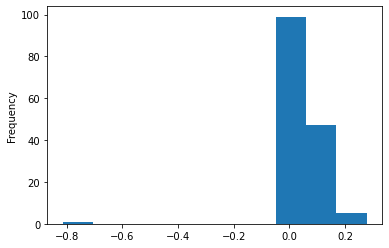

In [71]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange2013'].plot.hist() # histogram
plt.savefig('histagram_2013.png')

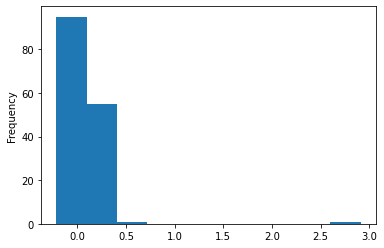

In [72]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange2018'].plot.hist() # histogram
plt.savefig('histagram_2018.png')

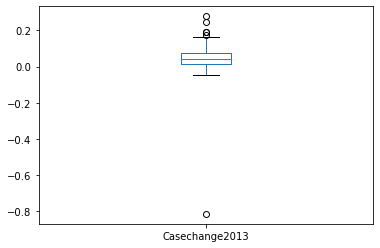

In [73]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange2013'].plot.box() # boxplot
plt.savefig('box_plot_1.png')

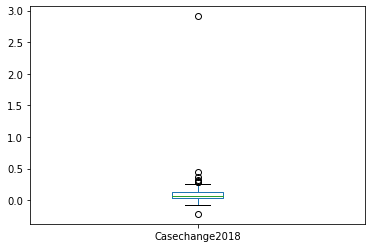

In [74]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange2018'].plot.box() # boxplot
plt.savefig('box_plot_2.png')

In [75]:
#delete the outlier 'Isles of Scilly'
df.drop([59],inplace = True)

In [76]:
# t-Test for two related samples
from scipy.stats import ttest_rel
print(ttest_rel(df['Casechange2013'],df['Casechange2018']))
#the result suggests H0 is rejected 

Ttest_relResult(statistic=-4.67154060609338, pvalue=6.593613093028499e-06)


In [77]:
#create dummies
dummies = pd.get_dummies(df['local_authority_type'],prefix = None,prefix_sep = "_",dummy_na = False,columns = None,drop_first =False)
dummies

,london_borough,metropolitan_borough,non_metropolitan_county,unitary_authority
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
147,0,1,0,0
148,0,0,0,1
149,0,1,0,0
150,0,0,1,0


In [78]:
#choose london_borough, metropolitan_borough and non_metropolitan_country as dummy variables 
#and combine them with original dataframe
df['Londonbor'] = dummies['london_borough']
df['Metrobor'] = dummies['metropolitan_borough']
df['Nonmetrocounty'] = dummies['non_metropolitan_county']

In [79]:
df1 = df[['Cleanair1','Cleanenv1','Healthtrain1','Schoolaware1','Mediaaware1','Subcounsel1','Londonbor','Metrobor','Nonmetrocounty']]

In [80]:
# There are so many independent variables and we should check if there is multicollinearity 
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [81]:
df_predictors_selected_VIF = drop_column_using_vif_(df1, thresh=5)
df_predictors_selected_VIF
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Cleanair1', 'Cleanenv1', 'Healthtrain1', 'Schoolaware1', 'Mediaaware1',
       'Subcounsel1', 'Londonbor', 'Metrobor', 'Nonmetrocounty'],
      dtype='object')


In [82]:
#the result above shows no variable is removed, so we will put all these variables into function
#model1 
model1 = sms.OLS(endog=df['Casechange2013'], exog=sms.add_constant(df_predictors_selected_VIF)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Casechange2013   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     5.997
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.28e-07
Time:                        14:16:40   Log-Likelihood:                 250.09
No. Observations:                 151   AIC:                            -480.2
Df Residuals:                     141   BIC:                            -450.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0286      0.018      1.594      0.113      -0.007       0.064
Cleanair1          0.0701      0.049      1.427      0.156      -0.027       0.167
Cleanenv1         -0.0180      0.047     -0.384      0.702      -0.111       0.075
Healthtrain1       0.0296      0.108      0.274      0.785      -0.184       0.243
Schoolaware1      -0.1048      0.040     -2.618      0.010      -0.184      -0.026
Mediaaware1        0.1387      0.092      1.513      0.133      -0.043       0.320
Subcounsel1        0.0237      0.153      0.155      0.877      -0.279       0.327
Londonbor          0.0614      0.011      5.740      0.000       0.040       0.083
Metrobor           0.0222      0.010      2.139      0.034       0.002       0.043
Nonmetrocounty    -0.0218      0.011     -1.928      0.056      -0.044       0.001
==============================================================================
Omnibus:                       30.293   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.442
Skew:                           0.994   Prob(JB):                     1.84e-11
Kurtosis:                       4.976   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

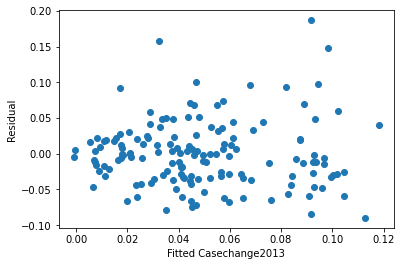

In [83]:
# residual analysis
%matplotlib inline
plt.figure(figsize=(6,4))
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted Casechange2013')
plt.ylabel('Residual')
plt.savefig('Residual_analysis12013_update.png')

In [84]:
#stepwise regression
model1_stepwise = sms.OLS(endog=df['Casechange2013'], exog=sms.add_constant(df[['Londonbor','Metrobor','Schoolaware1']])).fit()
model1_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Casechange2013   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.08e-08
Time:                        14:16:49   Log-Likelihood:                 246.08
No. Observations:                 151   AIC:                            -484.2
Df Residuals:                     147   BIC:                            -472.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0409      0.007      5.602      0.000       0.027       0.055
Londonbor        0.0664      0.010      6.588      0.000       0.046       0.086
Metrobor         0.0269      0.010      2.799      0.006       0.008       0.046
Schoolaware1    -0.0649      0.028     -2.347      0.020      -0.120      -0.010
==============================================================================
Omnibus:                       28.626   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.200
Skew:                           1.003   Prob(JB):                     6.86e-10
Kurtosis:                       4.639   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df2 = df[['Cleanair2','Cleanenv2','Healthtrain2','Schoolaware2','Mediaaware2','Subcounsel2','Londonbor','Metrobor','Nonmetrocounty']]

In [86]:
#collinearity diagnostics
df_predictors_selected_VIF = drop_column_using_vif_(df2, thresh=5)
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Cleanair2', 'Cleanenv2', 'Healthtrain2', 'Schoolaware2', 'Mediaaware2',
       'Subcounsel2', 'Londonbor', 'Metrobor', 'Nonmetrocounty'],
      dtype='object')


In [87]:
# we will put all these variables into function
#model2 
model2 = sms.OLS(endog=df['Casechange2018'], exog=sms.add_constant(df_predictors_selected_VIF)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Casechange2018   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.36e-13
Time:                        14:21:49   Log-Likelihood:                 197.32
No. Observations:                 151   AIC:                            -374.6
Df Residuals:                     141   BIC:                            -344.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0441      0.024      1.874      0.063      -0.002       0.091
Cleanair2         -0.0541      0.071     -0.759      0.449      -0.195       0.087
Cleanenv2          0.0504      0.067      0.753      0.453      -0.082       0.183
Healthtrain2       0.0595      0.158      0.376      0.707      -0.253       0.372
Schoolaware2      -0.1231      0.057     -2.162      0.032      -0.236      -0.011
Mediaaware2        0.2333      0.134      1.742      0.084      -0.031       0.498
Subcounsel2       -0.0122      0.219     -0.055      0.956      -0.445       0.421
Londonbor          0.1398      0.015      9.167      0.000       0.110       0.170
Metrobor           0.0336      0.015      2.277      0.024       0.004       0.063
Nonmetrocounty    -0.0003      0.016     -0.020      0.984      -0.032       0.031
==============================================================================
Omnibus:                        7.768   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.033
Skew:                           0.111   Prob(JB):                     0.000897
Kurtosis:                       4.477   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

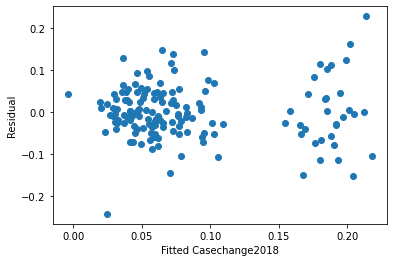

In [88]:
# residual analysis
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
plt.scatter(model2.fittedvalues, model2.resid)
plt.xlabel('Fitted Casechange2018')
plt.ylabel('Residual')
plt.savefig('Residual_analysis22018_update.png')

In [89]:
#stepwise regression
model2_stepwise = sms.OLS(endog=df['Casechange2018'], exog=sms.add_constant(df[['Londonbor','Metrobor','Schoolaware2']])).fit()
model2_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Casechange2018   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.97
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           9.72e-17
Time:                        14:21:54   Log-Likelihood:                 195.03
No. Observations:                 151   AIC:                            -382.1
Df Residuals:                     147   BIC:                            -370.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0673      0.010      7.057      0.000       0.048       0.086
Londonbor        0.1418      0.014     10.007      0.000       0.114       0.170
Metrobor         0.0350      0.013      2.598      0.010       0.008       0.062
Schoolaware2    -0.1099      0.034     -3.224      0.002      -0.177      -0.043
==============================================================================
Omnibus:                       10.191   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               20.330
Skew:                           0.209   Prob(JB):                     3.85e-05
Kurtosis:                       4.748   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""